In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras

from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#name of images
class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

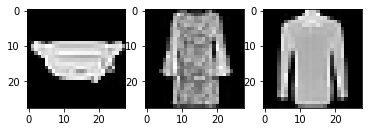

In [3]:
# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
taille_training_set = x_train.shape[0]
taille_test_set = x_test.shape[0]

# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#Test data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [5]:
# Set the CNN model
#initialisation du réseau de neurone
classifier = Sequential()

# Step 1 and 2 - Convolution / Pooling
classifier.add(Conv2D(filters=64, kernel_size=7, strides=1, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier.add(Dropout(0.25))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection -couche connecté
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.5))

# Couche de sortie
classifier.add(Dense(units = 10, activation = 'softmax'))

In [6]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = classifier.fit(x_train, y_train,
          batch_size=86,
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/200
698/698 [==============================] - 36s 5ms/step - loss: 0.6787 - accuracy: 0.7584 - val_loss: 0.3584 - val_accuracy: 0.8716
Epoch 2/200
698/698 [==============================] - 3s 5ms/step - loss: 0.3625 - accuracy: 0.8695 - val_loss: 0.3197 - val_accuracy: 0.8815
Epoch 3/200
698/698 [==============================] - 3s 5ms/step - loss: 0.3161 - accuracy: 0.8848 - val_loss: 0.2992 - val_accuracy: 0.8893
Epoch 4/200
698/698 [==============================] - 3s 5ms/step - loss: 0.2868 - accuracy: 0.8965 - val_loss: 0.2825 - val_accuracy: 0.8946
Epoch 5/200
698/698 [==============================] - 3s 5ms/step - loss: 0.2662 - accuracy: 0.9003 - val_loss: 0.2773 - val_accuracy: 0.8977
Epoch 6/200
698/698 [==============================] - 3s 4ms/step - loss: 0.2526 - accuracy: 0.9050 - val_loss: 0.2620 - val_accuracy: 0.9036
Epoch 7/200
698/698 [==============================] - 3s 4ms/step - loss: 0.2364 - accuracy: 0.9121 - val_loss: 0.2594 - val_accuracy: 0.906

In [10]:
loss, acc = classifier.evaluate(x_test, y_test, verbose=0)
fiabiliter=acc*100
print('La fiabilité du model sur les données de test est de :',fiabiliter," %")

La fiabilité du model sur les données de test est de : 92.00000166893005  %


In [ ]:
#classifier.save('classification_model.h5')

In [11]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir("./")
os.listdir("./drive/MyDrive/LIFPROJET")

Mounted at /content/drive


[]

In [12]:
classifier.save('./drive/MyDrive/LIFPROJET/classification_model.h5')

In [13]:
#Predict the test results
rounded_predictions = classifier.predict_classes(x_test)
rounded_predictions[1]

y_test[1]
import numpy as np
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]


#confusion matrix and classification report
print('Confusion Matrix :\n',confusion_matrix(rounded_labels, rounded_predictions))
print('\n')
print('Classification Report :\n',classification_report(rounded_labels, rounded_predictions))
print('\n')
print('Accuracy : ' ,accuracy_score(rounded_labels, rounded_predictions)*100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Confusion Matrix :
 [[872   0  16  10   5   1  94   0   2   0]
 [  2 979   1  10   2   0   4   0   2   0]
 [ 14   0 855   9  61   0  61   0   0   0]
 [ 10   3   9 923  26   0  27   0   2   0]
 [  1   0  54  18 877   0  50   0   0   0]
 [  0   0   0   0   0 986   0   9   0   5]
 [ 84   2  60  22  45   0 778   0   9   0]
 [  0   0   0   0   0   2   0 980   0  18]
 [  2   1   2   1   1   2   5   2 984   0]
 [  0   0   0   0   0   6   0  28   0 966]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.85      0.86      1000
           3       0.93      0.92      0.93      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.76      0.78      0.77      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98  

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

batches = datagen.flow(x_train, y_train, batch_size=64)

In [15]:
classifier.fit(batches, steps_per_epoch = len(x_train)//64, epochs=100,
                      use_multiprocessing=False)

Epoch 1/100
937/937 [==============================] - 16s 17ms/step - loss: 0.8264 - accuracy: 0.7193
Epoch 2/100
937/937 [==============================] - 16s 17ms/step - loss: 0.6563 - accuracy: 0.7617
Epoch 3/100
937/937 [==============================] - 16s 17ms/step - loss: 0.6051 - accuracy: 0.7785
Epoch 4/100
937/937 [==============================] - 16s 17ms/step - loss: 0.5738 - accuracy: 0.7866
Epoch 5/100
937/937 [==============================] - 16s 17ms/step - loss: 0.5509 - accuracy: 0.7952
Epoch 6/100
937/937 [==============================] - 16s 17ms/step - loss: 0.5298 - accuracy: 0.8026
Epoch 7/100
937/937 [==============================] - 16s 17ms/step - loss: 0.5130 - accuracy: 0.8096
Epoch 8/100
937/937 [==============================] - 16s 17ms/step - loss: 0.4991 - accuracy: 0.8150
Epoch 9/100
937/937 [==============================] - 16s 17ms/step - loss: 0.4937 - accuracy: 0.8165
Epoch 10/100
937/937 [==============================] - 16s 17ms/step - l

In [16]:
loss, acc = classifier.evaluate(x_test, y_test, verbose=0)
fiabiliter=acc*100
print('La fiabilité du model avec des filtres sur les données de test est de :',fiabiliter," %")

La fiabilité du model avec des filtres sur les données de test est de : 90.23000001907349  %


In [17]:
classifier.save('./drive/MyDrive/LIFPROJET/classification_model_ImageDataGenerator.h5')

# "LOAD_IMAGE"

In [7]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import ReduceLROnPlateau

def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction,axis = -1)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
    
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="red")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')

In [9]:
# Function to load and prepare the image in right shape
def load_image(filename):
    # Load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # Convert the image to array
    img = img_to_array(img)
    # Reshape the image into a sample of 1 channel
    img = img.reshape(1, 28, 28, 1)
    # Prepare it as pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# Load an image and predict the apparel class
img = load_image('./static/images/sac.jpg')
# Load the saved model
classifier = load_model('classification_model.h5')
# Predict the apparel class
class_prediction = classifier.predict_classes(img)
print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
8
Bag


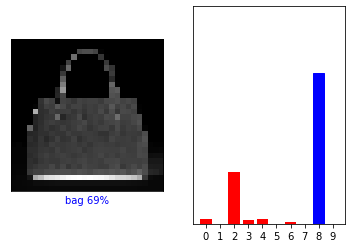

In [10]:
preds = classifier.predict(img)
for i in range(1):
    # image
    plt.subplot(1, 2, 2*i+1)
    plot_image(preds[i], img[i])
    # bar chart
    plt.subplot(1, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show()